<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Two_Level_Factorial_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This Python notebook demonstrates the computation of Two-Level factorial experimental analysis. (k=2 and k=4)
In this case, k=2Ref.
https://www.statsmodels.org/stable/regression.html#examples


In [2]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc


# k=2 example. The example is from Montgomery Intro to SQC (7th ed chap 13 Ex 13.6 Router Experiment).  

In [ ]:
# factor A is bit size and factor B is speed and the response is vibration
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/Ex13-6%20Router%20Experiment%202k%20k%3D2.csv', sep=',', na_values=".")

data

,A,B,Vibration
0,-1,-1,18.2
1,1,-1,27.2
2,-1,1,15.9
3,1,1,41.0
4,-1,-1,18.9
5,1,-1,24.0
6,-1,1,14.5
7,1,1,43.9
8,-1,-1,12.9
9,1,-1,22.4


In [ ]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          16 non-null     int64  
 1   B          16 non-null     int64  
 2   Vibration  16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes


# Modeling Approach 1: statsmodel using indivial independent variables

In [ ]:
# To generate anova table using the ols model from statsmodel
# generate ANOVA table
# we use ordinary least square method for full factorial

modelA = ols('Vibration ~ A + B + A:B', data=df).fit()
aov_table = sm.stats.anova_lm(modelA, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
A,1107.225625,1.0,185.251595,1.174669e-08
B,227.255625,1.0,38.022482,4.826292e-05
A:B,303.630625,1.0,50.800899,1.201078e-05
Residual,71.722500,12.0,NaN,NaN


In [ ]:
print(modelA.summary())

                            OLS Regression Results                            
Dep. Variable:              Vibration   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     91.36
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.57e-08
Time:                        12:58:51   Log-Likelihood:                -34.705
No. Observations:                  16   AIC:                             77.41
Df Residuals:                      12   BIC:                             80.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.8313      0.611     38.991      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Analysis: there are thee F test here. All three have very small p values. The conclusion is that the main effect and the two-factor interaction are significant at the (1-p)100% significant level

# Modeling Approach 2: statsmodel using design matrix X

In [ ]:
#create the interaction column
#convert the dataframe column into numpy for computation
aa=df[['A']].to_numpy()
bb=df[['B']].to_numpy()
AB=aa*bb
AB

array([[ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [ 1]])

In [ ]:
# attached the AB column into the dataframe df
# add a column of 1s into the X matrix
# X is the design matrix
df['AB']=AB
X=df[['A', 'B', 'AB']]
X = sm.add_constant(X) # adding a constant
X

,const,A,B,AB
0,1.0,-1,-1,1
1,1.0,1,-1,-1
2,1.0,-1,1,-1
3,1.0,1,1,1
4,1.0,-1,-1,1
5,1.0,1,-1,-1
6,1.0,-1,1,-1
7,1.0,1,1,1
8,1.0,-1,-1,1
9,1.0,1,-1,-1


In [ ]:
# Y is the response
Y=df[['Vibration']]
Y

,Vibration
0,18.2
1,27.2
2,15.9
3,41.0
4,18.9
5,24.0
6,14.5
7,43.9
8,12.9
9,22.4


In [ ]:
# with statsmodels and design matrix X

modelB = sm.OLS(Y, X)
outcomeB=modelB.fit()
print(outcomeB.summary())


                            OLS Regression Results                            
Dep. Variable:              Vibration   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     91.36
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.57e-08
Time:                        13:01:51   Log-Likelihood:                -34.705
No. Observations:                  16   AIC:                             77.41
Df Residuals:                      12   BIC:                             80.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8313      0.611     38.991      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Residual Analysis

In [ ]:
# res is the fitted model
outcomeB.resid

0     2.100
1     3.175
2     0.975
3     0.725
4     2.800
5    -0.025
6    -0.425
7     3.625
8    -3.200
9    -1.625
10    0.175
11   -3.975
12   -1.700
13   -1.525
14   -0.725
15   -0.375
dtype: float64

# Normality Test

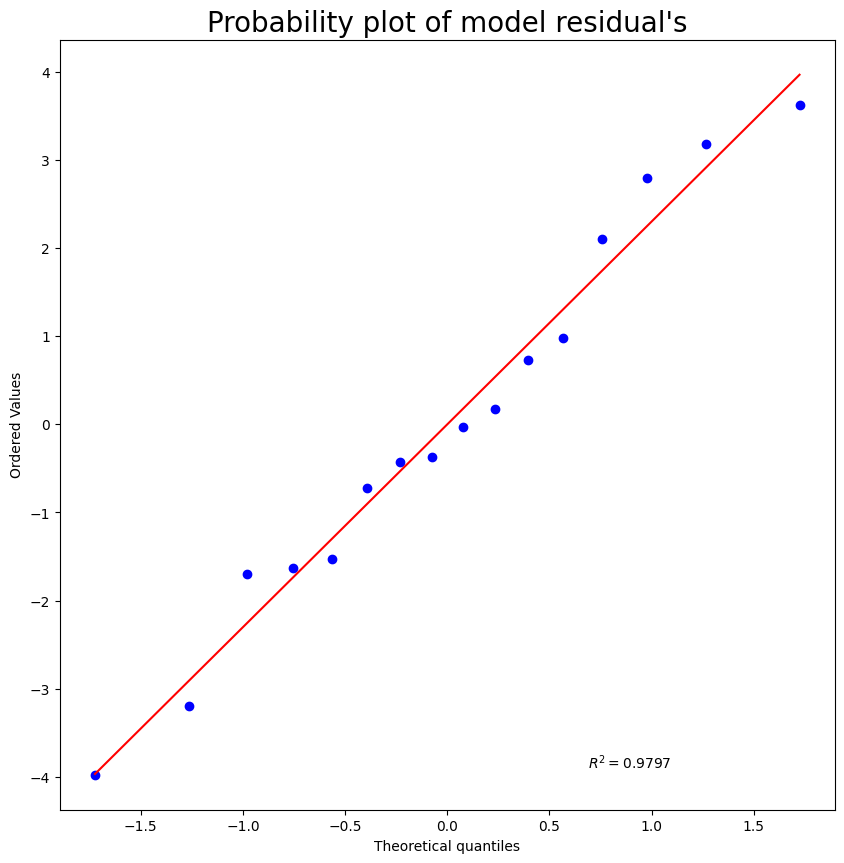

In [ ]:
# Residual Analysis
# normal check
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(outcomeB.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [ ]:
# Homogeneity of Variance check
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['Vibration'][df['A'] == -1],
             df['Vibration'][df['A'] == 1])


LeveneResult(statistic=39.79940673317216, pvalue=1.9270976654018198e-05)

Since p value is very small, we reject that factor A has equal variance

In [ ]:
# Homogeneity of Variance check
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['Vibration'][df['B'] == -1],
             df['Vibration'][df['B'] == 1])

LeveneResult(statistic=45.962979982969955, pvalue=8.884422085982283e-06)

The p value of the Levene is very small. We reject the hypothesis that the variances from different primer type are different

# Constant Variance Assumption Check

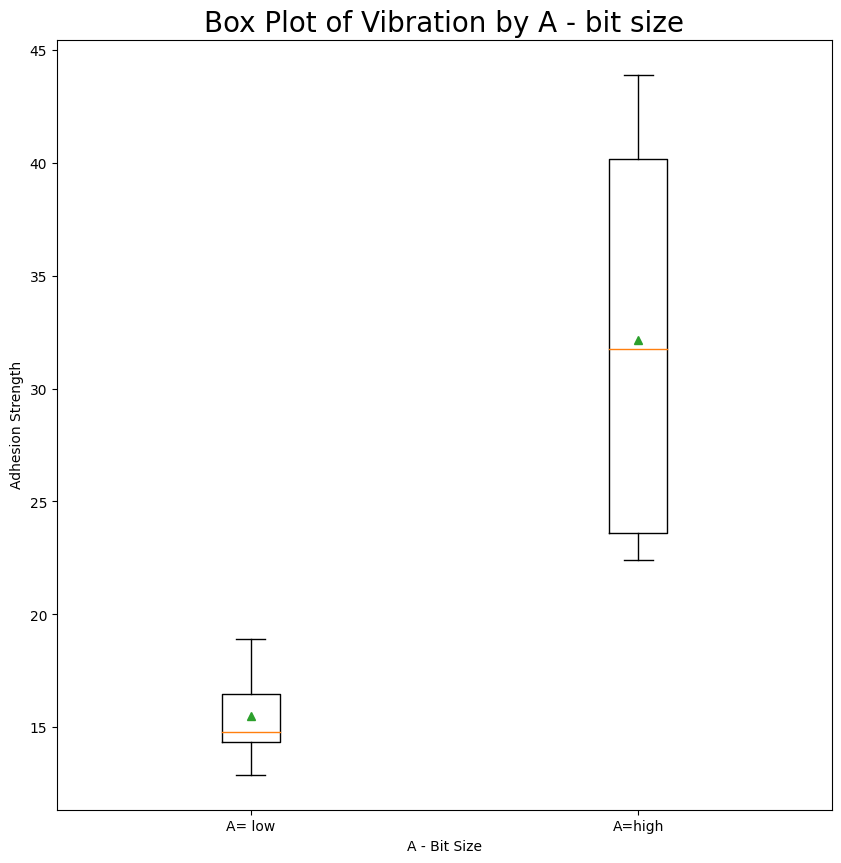

In [ ]:
# Box plots by factor Primer_type'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A - bit size", fontsize= 20)
ax.set

data2 = [df['Vibration'][df['A'] == -1],
             df['Vibration'][df['A'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A - Bit Size")
plt.ylabel("Adhesion Strength")

plt.show()

The variation of A at low is much smaller than that of A at high.

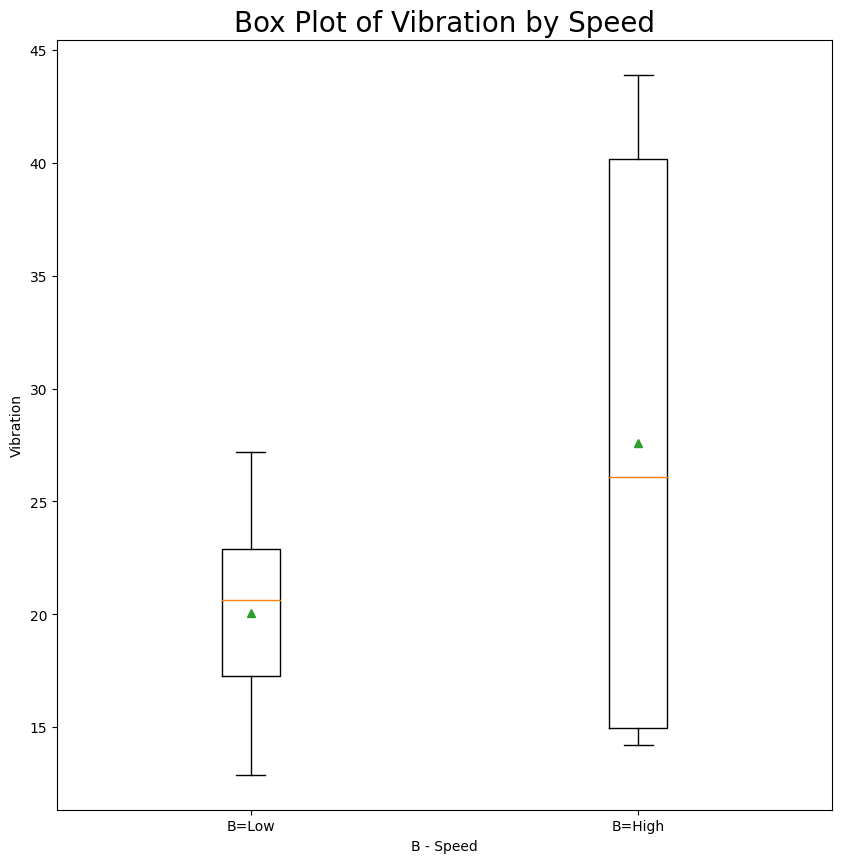

In [ ]:
# Box plots by factor Application Methods
# same instruction as the previous factor Primer types

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by Speed", fontsize= 20)
ax.set

data2 = [df['Vibration'][df['B'] == -1],
         df['Vibration'][df['B'] == +1]]


ax.boxplot(data2,
           labels= ['B=Low', 'B=High'],
           showmeans= True)

plt.xlabel("B - Speed")
plt.ylabel("Vibration")

plt.show()

The variation of B at low is much smaller than that of B at high.

In [ ]:
eij=outcomeB.resid
eij

0     2.100
1     3.175
2     0.975
3     0.725
4     2.800
5    -0.025
6    -0.425
7     3.625
8    -3.200
9    -1.625
10    0.175
11   -3.975
12   -1.700
13   -1.525
14   -0.725
15   -0.375
dtype: float64

# Independence check:  you should conduct your experiments using the random order generated to collect the data


In [ ]:
# testing the random order for collecting observations
# Minitab calls the order variable, run order
# the following code generate a random order
# you should conduct your experiments using the random order generated
# for example, the first number is 5, it means that you will run the setting 5 in the experimentation table
# observation label 5 is primier type 3 and application method 2 (spraying)
# the run observation 11 and so on until all observations are collected
# import random (see the first cell)
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[5, 7, 1, 2, 3, 8, 14, 10, 6, 13, 12, 11, 9, 0, 15, 4]


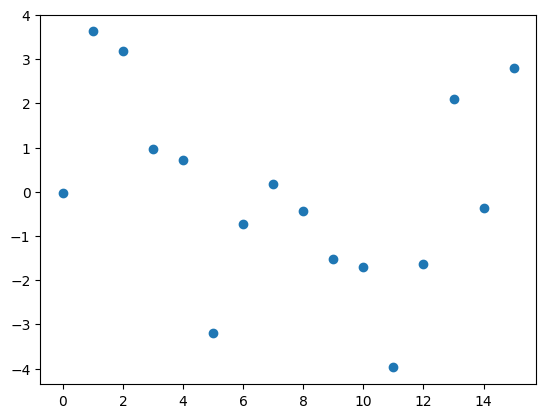

In [ ]:
# assume that this random order is how we collected the data in time sequence
# if there is no pattern in the scatter plot, then don't reject independence assumption

eij=outcomeB.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order] # assign run order (see the previous code box)

plt.scatter(x, y)

The random order from the scatter plot above shows no pattern. If the data in the first half of the experiments are lower than 0 while those of the second half are above 0. Then there is a bias in data collection. If the residuals are small in the beginning but graduately increase. Or vice versa. It is a concern as well. In these cases, independence assumption is violated.

# K=4 example
The following example is from Montgomery Intro to SPC k=4 n=1 example.
A: Gap, B: Pressure, C: Flow, D: power; y: etch rate (larger the better)

In [3]:
#use theread option where the data file is rignt under your default google drive directory
#note that the path is case sensitive
#use a text editor such as notepad to see the seperator dividing data
#go the 1st read option for local file: see the Read data from local file notebook for an example
# Four Factors A-D and the response is Etch Rate
# the run_oder is the order when the combination was experimented which will be used for plotting residuals
# the experiments also include four center points
df = pd.read_csv('https://raw.githubusercontent.com/changsksu/KState_IMSE541/main/EX%2013.8%20Etch%20Rate%20k%3D4%20cpts.csv', sep=',', na_values=".")

df

,stand_order,run_order,A_Gap,B_Pressure,C_Flow,D_Power,EtchRate
0,1,10,-1,-1,-1,-1,550
1,2,13,1,-1,-1,-1,669
2,3,7,-1,1,-1,-1,604
3,4,3,1,1,-1,-1,650
4,5,9,-1,-1,1,-1,633
5,6,14,1,-1,1,-1,642
6,7,1,-1,1,1,-1,601
7,8,11,1,1,1,-1,635
8,9,16,-1,-1,-1,1,1037
9,10,4,1,-1,-1,1,749


In [11]:
Xmain=df[['A_Gap', 'B_Pressure', 'C_Flow', 'D_Power']][0:16]
Xmain

,A_Gap,B_Pressure,C_Flow,D_Power
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [12]:
# convert x1 to x4 input columns into a polynomial matrix with intercept columns
# computation is done in numpy and convert it into Panda dataframe
# eventhough you can generate the full model, the factional design won't allow you to fit every term
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4'])
# if the full model is designed then x1x2x3x4 should be added, otherwise leave it out
x1x2x3x4=df['A_Gap'] * df['B_Pressure'] *df['C_Flow'] * df['D_Power']
xxpd['x1x2x3x4']=x1x2x3x4
xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4,x1x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1


In [14]:
# in this example, we see that there is not enough degree of freedom to fit the full model
X=xxpd
Y=df[['EtchRate']][0:16]
regr=LinearRegression()
regr.fit(X,Y)
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               EtchRate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                nan
Time:                        14:59:19   Log-Likelihood:                 429.73
No. Observations:                  16   AIC:                            -827.5
Df Residuals:                       0   BIC:                            -815.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I            776.0625        inf          0        n

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [19]:
# X2=xxpd["I", "x1", "x2", "x3", "x4", "x1x2", "x1x3", "x1x4", "x2x3", "x2x4", "x3x4"]
xx2=Xmain.to_numpy()
# X2=xxpd["I", "x1", "x2", "x3", "x4"]
poly= PolynomialFeatures(degree=2, interaction_only=True)
X2=pd.DataFrame(poly.fit_transform(xx2), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4'])
# if the full model is designed then x1x2x3x4 should be added, otherwise leave it out
Y2=df[['EtchRate']][0:16]
regr=LinearRegression()
regr.fit(X2,Y2)
model2 = sm.OLS(Y2, X2)
res2=model2.fit()
print(res2.summary())


                            OLS Regression Results                            
Dep. Variable:               EtchRate   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     25.58
Date:                Mon, 07 Oct 2024   Prob (F-statistic):            0.00113
Time:                        15:23:00   Log-Likelihood:                -74.353
No. Observations:                  16   AIC:                             170.7
Df Residuals:                       5   BIC:                             179.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I            776.0625     11.284     68.774      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
# Reduce model
# use statsmodels for OLS fitting and t statistics
# in this case, X is xxpd with the first column I
Y=df[['EtchRate']][0:16]
X3=xxpd[['I','x1','x4','x1x4']]
model3 = sm.OLS(Y, X3)
res=model3.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               EtchRate   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     97.91
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.05e-08
Time:                        15:34:20   Log-Likelihood:                -80.086
No. Observations:                  16   AIC:                             168.2
Df Residuals:                      12   BIC:                             171.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I            776.0625     10.423     74.458      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


**Your turn: run residual analysis on the reduced model!**